# **Análisis de sentimientos de los comentarios de las películas IMDB**


**Acerca de este conjunto de datos**

Conjunto de datos IMDB con 50.000 reseñas de películas para procesamiento de lenguaje natural o análisis de texto.
Este es un conjunto de datos para la clasificación de sentimientos binarios que contiene sustancialmente más datos que los conjuntos de datos de referencia anteriores. Proporcionamos un conjunto de 25.000 reseñas de películas muy polarizadas para formación y 25.000 para pruebas. Por lo tanto, prediga la cantidad de reseñas positivas y negativas utilizando algoritmos de clasificación o de aprendizaje profundo.
Para obtener más información sobre el conjunto de datos, consulte el siguiente enlace,
http://ai.stanford.edu/~amaas/data/sentiment/

## **Problema a resolver:**

Tenemos que predecir el número de comentarios positivos y negativos a partir de un análisis de sentimientos usando diferentes modelos de clasificación.

### **Importamos las librerias**

In [1]:
#Cargar las librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


## **Importar el dataset de entrenamiento**

In [3]:
#importando el dataset de entrenamiento
imdb_data=pd.read_csv('IMDB Dataset.csv')
nRow, nCol = imdb_data.shape
print(f'Hay {nRow} filas y {nCol} columnas')
#Se ajusta el tamaño
print('Se ajusta el tamaño')
imdb_data= imdb_data.head(2000)
nRow, nCol = imdb_data.shape
print(f'Hay {nRow} filas y {nCol} columnas')
imdb_data.head(10)

Hay 50000 filas y 2 columnas
Se ajusta el tamaño
Hay 2000 filas y 2 columnas


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


## **Análisis exploratorio de los datos**

In [4]:
#Resumen del dataset
imdb_data.describe()

,review,sentiment
count,2000,2000
unique,2000,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,1005


## **Contador de sentimientos**

In [5]:
#contador de sentimientos
imdb_data['sentiment'].value_counts()

sentiment
positive    1005
negative     995
Name: count, dtype: int64

Podemos apreciar que el dataset está equilibrado.

## **Dividiendo el Dataset de entrenamiento**

In [6]:
#dividiendo el dataset 
#dataset de entrenamiento
train_reviews=imdb_data.review[:1000]
train_sentiments=imdb_data.sentiment[:1000]
#dataset de prueba
test_reviews=imdb_data.review[1000:]
test_sentiments=imdb_data.sentiment[1000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(1000,) (1000,)
(1000,) (1000,)


## **Normalización del texto**

In [7]:
#Tokenización del texto
tokenizer=ToktokTokenizer()
#Poniendo las "Stopwords" en inglés
stopword_list=nltk.corpus.stopwords.words('english')

## **Borrando restos de html y texto sobrante**

In [8]:
#Borrando restos de html
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Borrando corchetes
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

## **Borrando caracteres especiales**

In [9]:
#definimos la función para borrar los caracteres especiales
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Aplicamos la función en la columna "review"
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

### **Retocando el texto**

## **Borrando las "stopwords"**

In [10]:
#Retocando el texto
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Aplicar la función en la columna "review"
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

In [11]:
#Creando las "stopwords" en inglés
stop=set(stopwords.words('english'))
print(stop)

#borrando las stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Aplicar la función a la columna review
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

{'this', 'each', 'their', 'down', 'why', 'about', "haven't", 'you', 'at', 'after', "shan't", 'now', 'between', "should've", 'there', 'needn', 'which', 'they', 'into', 'up', 'to', 'ain', 'while', 'she', 'the', 'where', 'ourselves', 'any', 'it', 'so', 'd', 'o', 'own', 'themselves', 'some', "doesn't", "hasn't", 'himself', 'our', 'then', 'because', 'those', 'am', 'ma', 'his', 'me', 'do', 'myself', 'that', 'shouldn', 'out', "don't", 'most', 'than', 'of', 'i', 'yourself', 'nor', 'until', 'aren', 'he', 'won', 'or', 've', 'whom', 'but', 'yourselves', 'wouldn', "wasn't", 't', 'm', 'did', 'further', "needn't", "you'd", 'didn', 'herself', 'during', 'once', 'were', 'more', 'yours', "mightn't", 'only', 'just', 'had', "won't", "you've", 'we', 's', 'again', 'wasn', 'no', 'does', 'very', 'couldn', 'hadn', 'don', 'its', 'doing', 'before', 'my', 'as', 'through', 'off', 'been', "aren't", 'these', 'y', "you're", 'isn', 'and', "didn't", 'other', 'll', 'her', 'who', 'can', 'by', 're', "wouldn't", 'against',

## **Normalizar los comentarios de entrenamiento**

In [12]:
#normalizar los comentarios de entrenamiento
norm_train_reviews=imdb_data.review[:1000]
norm_train_reviews[0]
#convertir el dataset string
#norm_train_string=norm_train_reviews.to_string()
#Corrección de ortografía usando Textblob
#norm_train_spelling=TextBlob(norm_train_string)
#norm_train_spelling.correct()
#Tokenizacion usando Textblob
#norm_train_words=norm_train_spelling.words
#norm_train_words

'one review ha mention watch 1 oz episod youll hook right thi exactli happen meth first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

## **Normalizar los comentarios de prueba**

In [13]:
#Normalizar los comentarios de prueba
norm_test_reviews=imdb_data.review[1000:]
norm_test_reviews[1005]
##conovertir el dataframe en string
#norm_test_string=norm_test_reviews.to_string()
#corrección de ortografía usando Textblob
#norm_test_spelling=TextBlob(norm_test_string)
#print(norm_test_spelling.correct())
#Tokenización usando Textblob
#norm_test_words=norm_test_spelling.words
#norm_test_words

'thi film bad dialogu stori actor actress everyth hard imagin well see wors movi thi year follow year love brother set australia among italian immigr ha noth shallow clich italian cultur offer quit tell even italian itali speak english film messag film ugli peopl marri ugli peopl beauti peopl marri beauti peopl truli discomfort giovanni ribisi quit good film like suburbia lost translat hi pseudoitalian accent hard bear see thi film risk trash trash'

**Bags of words modelo **

Se usa para convertir texto a vectores numéricos (Bag of words).

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Contar "Vectorizer" para el bag of words
cv = CountVectorizer(min_df=1, max_df=1.0, binary=False, ngram_range=(1, 3))

# Comentarios de entrenamiento transformados
cv_train_reviews = cv.fit_transform(norm_train_reviews)

# Comentarios de prueba transformados
cv_test_reviews = cv.transform(norm_test_reviews)

print('BOW_cv_train:', cv_train_reviews.shape)
print('BOW_cv_test:', cv_test_reviews.shape)

# vocab = cv.get_feature_names_out()  # Para obtener los nombres de las características


BOW_cv_train: (1000, 241625)
BOW_cv_test: (1000, 241625)


#### **Term Frequency-Inverse Document Frequency model (TFIDF)**

 Se usa para convertir documentos de texto en matrices con caracteristicas de TFIDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tfidf vectorizer
tv = TfidfVectorizer(min_df=1, max_df=1.0, use_idf=True, ngram_range=(1, 3))

# Comentarios de entrenamiento transformados
tv_train_reviews = tv.fit_transform(norm_train_reviews)

# Comentarios de prueba transformados
tv_test_reviews = tv.transform(norm_test_reviews)

print('Tfidf_train:', tv_train_reviews.shape)
print('Tfidf_test:', tv_test_reviews.shape)


Tfidf_train: (1000, 241625)
Tfidf_test: (1000, 241625)


## **Etiquetando el texto de sentimientos**

In [16]:
#Etiquetando el texto de sentimientos
lb=LabelBinarizer()
#datos de sentimientos transformados
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(2000, 1)


## **Dividir los datos de los sentimientos**

In [17]:
#Dividir los datos de los sentimientos
train_sentiments=sentiment_data[:1000]
test_sentiments=sentiment_data[1000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]


# **Modelando el dataset**

## **Nos permiteconstruir un modelo de regresion logistica para las dos bag of words y funciones tfidf.**

In [18]:
#Entrenando el modelo
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Ajustando el modelo para la Bag Of Words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Ajustando el modelo para las funciones tfidf
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


## **Modelo de regresion logistica sobre el test dataset.**

In [19]:
#Prediciendo el modelo de bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Prediciendo el modelo para caracteristicas tfidf
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0
 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0
 1 1 1 0 0 0 1 0 1 0 1 1 

## **Eficacia del modelo**

In [20]:
#Puntuación de la eficacia para bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Puntuación de la eficacia para caracteristicas tfidf 
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7
lr_tfidf_score : 0.811


## **Print de la clasificación**

In [21]:
#Clasificación para bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Clasificación para las características tfidf
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.63      0.93      0.76       496
    Negative       0.88      0.47      0.61       504

    accuracy                           0.70      1000
   macro avg       0.76      0.70      0.68      1000
weighted avg       0.76      0.70      0.68      1000

              precision    recall  f1-score   support

    Positive       0.79      0.85      0.82       496
    Negative       0.84      0.78      0.81       504

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



## **Matriz de confusión**

In [22]:
#matriz de confusión de la bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[237 267]
 [ 33 463]]
[[391 113]
 [ 76 420]]


## **Descenso gradiente estocástico o máquinas de vectores de soporte(svm) para las bag of words y características tfidf**

In [23]:
#Entrenando el svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#Ajustando el svm para bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#Ajustando el svm para características tfidf 
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


## **Modelo del rendimiento sobre la información de prueba**

In [24]:
#Prediciendo el modelo para la bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Prediciendo el modelo para las características tfidf 
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1
 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0
 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0
 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0
 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1
 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0
 1 1 1 1 0 0 1 0 1 0 1 1 

## **Exactitud del modelo**

In [25]:
#Exactitud de la puntuación para la bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Exactitud de la puntuación para las caracteristicas tfidf 
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.783
svm_tfidf_score : 0.836


## **Print de la clasificación**

In [26]:
#Clasificación para la bag of words
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Clasificación para las caracteristicas tfidf
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.73      0.90      0.80       496
    Negative       0.87      0.67      0.76       504

    accuracy                           0.78      1000
   macro avg       0.80      0.78      0.78      1000
weighted avg       0.80      0.78      0.78      1000

              precision    recall  f1-score   support

    Positive       0.85      0.82      0.83       496
    Negative       0.83      0.85      0.84       504

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



## **Grafico de la matriz de confusión**

In [27]:
#Matriz de confusión para la bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#Matriz de confusión para características tfidf 
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[336 168]
 [ 49 447]]
[[430  74]
 [ 90 406]]


## **Multinomial Naive Bayes para las bag of words y características tfidf**

In [28]:
#entrenando el modelo
mnb=MultinomialNB()
#justando el svm para bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#ajustando el svm para las características tfidf 
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


## **Modelo de rendimiento en la información de prueba**

In [29]:
#Prediciendo el modelo para las bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Prediciendo el modelo para las caractristicas tfidf
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1
 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0
 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0
 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1
 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0
 1 1 1 0 0 1 1 0 1 0 1 1 

## **Exctitud del modelo**

In [30]:
#Exactitud de la puntuación para las bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Exactitud de la puntuación para las características tfidf
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.808
mnb_tfidf_score : 0.829


## **Print de la clasificación**

In [31]:
#Clasificación para las bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Clasificación para las características tfidf 
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.76      0.91      0.82       496
    Negative       0.88      0.71      0.79       504

    accuracy                           0.81      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.82      0.81      0.81      1000

              precision    recall  f1-score   support

    Positive       0.79      0.88      0.84       496
    Negative       0.87      0.78      0.82       504

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



## **Grafico de la matriz de confusion**

In [32]:
#confusion matrix para la bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix para las características tfidf 
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[359 145]
 [ 47 449]]
[[391 113]
 [ 58 438]]


**Veamos cuales han sido las palabras positivas y negativas de los comentarios usando WordCloud**

## **Word cloud para las palabras de los comentarios positivos**

<function matplotlib.pyplot.show(close=None, block=None)>

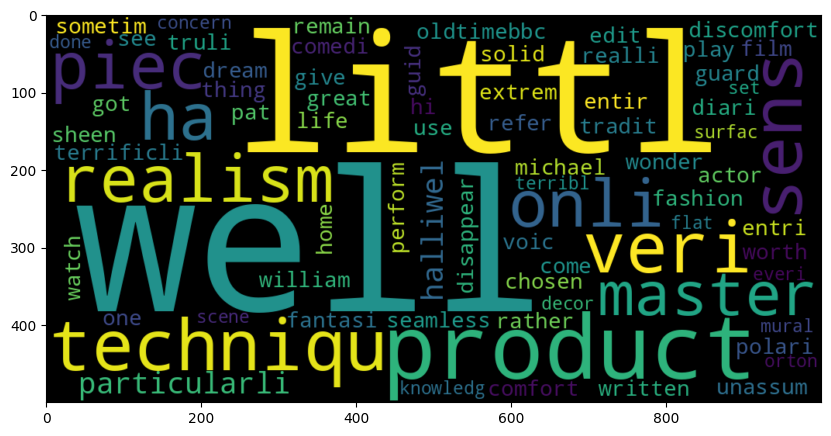

In [33]:
#Word cloud para las palabras de los comentarios positivos
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

## **Word cloud para las palabras de los comentarios negativos**

<function matplotlib.pyplot.show(close=None, block=None)>

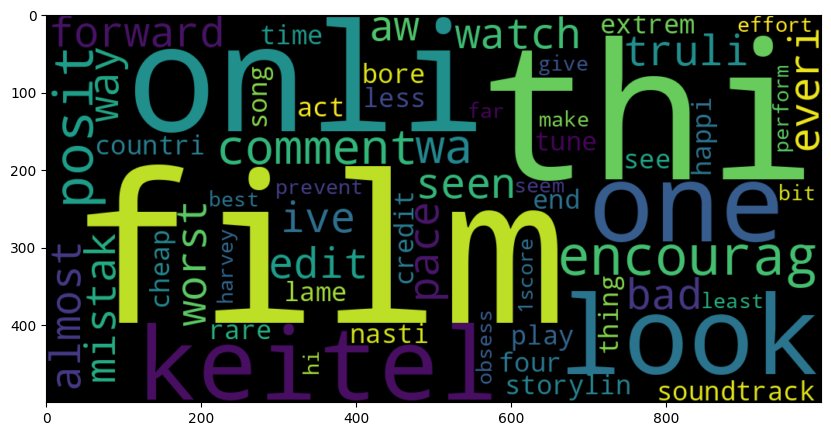

In [34]:
#Word cloud para las palabras de los comentarios negativos
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

## **Conclusión:**

* Podemos observar que tanto la regresión logística como el modelo ingenuo de Bayes multinomial funcionan bien en comparación con las máquinas de vectores de soporte lineal.
* Aún así, podemos mejorar la precisión de los modelos preprocesando datos y utilizando modelos de léxico como Textblob.